#**Install and import dependencies**



In [ ]:
# Instalamos MediaPipe para poder ser utilizado
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 25.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
# Importamos las dependencias necesarias
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from google.colab.patches import cv2_imshow
from IPython.display import clear_output

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Accede a los módulos de drawing desde mediapipe
mp_drawing = mp.solutions.drawing_utils
drawing_styles = mp.solutions.drawing_styles

# Para los módulos específicos de detección:
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose

In [ ]:
# Importe el modelo holistic de MediaPipe que proporciona herramientas para la detección simultánea de rostros, manos y poses.
mp_holistic = mp.solutions.holistic

# Import drawing utilities from MediaPipe solutions which allow for easy visualization of detected landmarks and connections.
# mp_drawing = mp.solutions.drawing_utils

In [ ]:
def mediapipe_detection(image, model):
    # Convierte el color de la imagen de BGR (usado por OpenCV) a RGB (usado por MediaPine) antes del procesamiento.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Configura la imagen como no grabable para pasarla como referencia y mejorar el rendimiento.
    image.flags.writeable = False

    # Procesa la imagen utilizando model de MediaPipe model para detectar los landmarks.
    results = model.process(image)

    # Permite escribir en la imagen nuevamente antes de cambiar el espacio de color a BGR para OpenCV.
    image.flags.writeable = True

    # Convierte el color de la imagen de RGB a BGR despues del procesamiento para que se muestre correctamente en OpenCV.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Devuelve la imagen procesada y los resultados de la deteccion.
    return image, results

In [ ]:
def draw_landmarks(image, results):
    # Utilidades de MediaPipe drawing para dibuar los puntos puntos de referencia faciales.
    # Las conexciones entre los landmarks estan definidas por FACE_CONNECTIONS del modelo holistico.
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)

    # Utilidades de MediaPipe drawing para dibuar los puntos puntos de referencia corporales.
    # Las conexciones entre los landmarks estan definidas por POSE_CONNECTIONS del modelo holistico.
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

    # Utilidades de MediaPipe drawing para dibuar los puntos puntos de referencia de la mano izquierda.
    # Las conexciones entre los landmarks estan definidas por HAND_CONNECTIONSdel modelo holistico.
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

    # Utilidades de MediaPipe drawing para dibuar los puntos puntos de referencia de la mano derecha.
    # Las conexciones entre los landmarks estan definidas por HAND_CONNECTIONSdel modelo holistico.
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [ ]:
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
mp_holistic = mp.solutions.holistic
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose

def draw_styled_landmarks(image, results):
    # Dibuja los puntos de referencia de la cara con un estilo personalizado.
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style(),
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style()
        )

    # Dibuja los puntos de referencia de la pose con un estilo personalizado.
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.pose_landmarks,
            connections=mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
        )

    # Dibuja los puntos de referencia de la mano izquierda con un estilo personalizado.
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.left_hand_landmarks,
            connections=mp_hands.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style()
        )

    # Dibuja los puntos de referencia de la mano derecha con un estilo personalizado.
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=results.right_hand_landmarks,
            connections=mp_hands.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style()
        )

In [ ]:
# Importa los módulos necesarios para los puntos de referencia y las conexiones específicas
mp_face_mesh = mp.solutions.face_mesh
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose

def draw_styled_landmarks(image, results):
    # Verifica si hay landmarks de cara y dibújalos con sus conexiones específicas
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_face_mesh.FACEMESH_CONTOURS,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )

    # Verifica si hay landmarks de pose y dibújalos con sus conexiones específicas
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )

    # Verifica si hay landmarks de manos y dibújalos con sus conexiones específicas
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )

    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

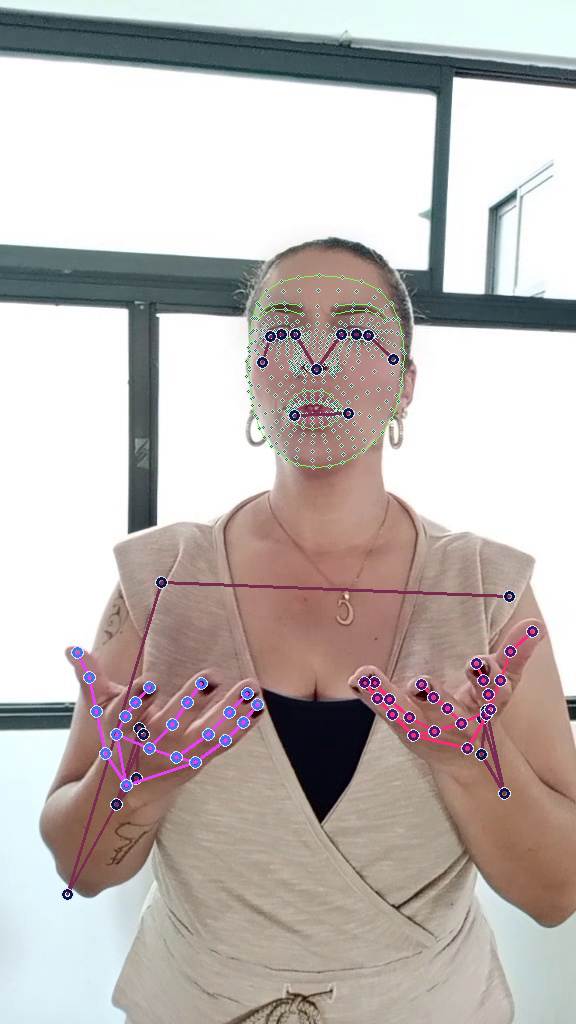

In [ ]:
folder_path = '/content/drive/MyDrive/UNIR/TFE/LSC/Con Video/Frames/bancos/1'

# Obtener una lista de los archivos de imagen en la carpeta.
# La lista debe estar ordenadapara el procesamiento.
frame_files = sorted([os.path.join(folder_path, fname) for fname in os.listdir(folder_path)
                      if fname.endswith('.jpg') or fname.endswith('.png')])

mp_holistic = mp.solutions.holistic

# Inicializar el modelo de MediaPipe Holistic con umbrales de confianza especificados para la detección y el seguimiento.
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Bucle a través de cada archivo de imagen en la lista de fotogramas.
    for frame_file in frame_files:
        # Leer la imagen del archivo.
        frame = cv2.imread(frame_file)

        # Si la imagen se leyó correctamente, se procesa.
        if frame is not None:
            # Usar la función mediapipe_detection para procesar la imagen con el modelo holístico y obtener puntos de referencia.
            image, results = mediapipe_detection(frame, holistic)

            # Dibujar los puntos de referencia de detección en la imagen con estilos personalizados usando la función draw_styled_landmarks.
            draw_styled_landmarks(image, results)

            # Muestra la imagen resultante con puntos de referencia en una ventana.
            cv2_imshow(image)

            # Espera un poco antes de pasar a la siguiente imagen.
            time.sleep(0.2)  # Velocidad con la que se muestran las imagenes.

            # Limpia la salida después de cada imagen.
            clear_output(wait=True)
        else:
            print(f"No se pudo cargar la imagen {frame_file}. Continuando con la siguiente imagen.")

In [ ]:
draw_styled_landmarks(frame, results)

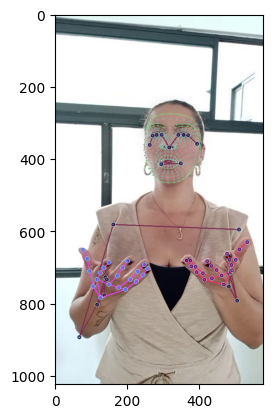

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# **Extraer los Keypoint Values**

In [ ]:
# Comprobar y mostrar información de la mano izquierda si está presente
if results.left_hand_landmarks:
    print(f'Número de keypoints de la mano izquierda: {len(results.left_hand_landmarks.landmark)}')
else:
    print('No se detectaron keypoints de la mano izquierda.')

# Comprobar y mostrar información de la mano derecha si está presente
if results.right_hand_landmarks:
    print(f'Número de keypoints de la mano derecha: {len(results.right_hand_landmarks.landmark)}')
else:
    print('No se detectaron keypoints de la mano derecha.')

# Comprobar y mostrar información del rostro si está presente
if results.face_landmarks:
    print(f'Número de keypoints del rostro: {len(results.face_landmarks.landmark)}')
else:
    print('No se detectaron keypoints del rostro.')

# Comprobar y mostrar información del cuerpo (pose) si está presente
if results.pose_landmarks:
    print(f'Número de keypoints de la pose: {len(results.pose_landmarks.landmark)}')
else:
    print('No se detectaron keypoints de la pose.')

Número de keypoints de la mano izquierda: 21
Número de keypoints de la mano derecha: 21
Número de keypoints del rostro: 468
Número de keypoints de la pose: 33


In [ ]:
len(results.pose_landmarks.landmark)

33

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
  test = np.array([res.x, res.y, res.z, res.visibility])
  pose.append(test)

In [ ]:
# Si se detectan puntos clave de pose en los resultados, crea un array 2D de estos puntos incluyendo
# las coordenadas (x, y, z) y la visibilidad (visibility). Luego aplana el array en uno unidimensional (1D).
# Si no se detectan puntos clave de pose, crea un array 1D de ceros con una longitud de 33 puntos clave (landmarks)
# por 4 valores por cada punto (x, y, z, visibility), para un total de 132 elementos.
pose = np.array([[res.x, res.y, res.z, res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

# Si se detectan puntos clave faciales en los resultados, crea un array 2D de estos puntos incluyendo
# las coordenadas (x, y, z). Luego aplana el array en uno unidimensional (1D).
# Si no se detectan puntos clave faciales, crea un array 1D de ceros con una longitud de 468 puntos clave (landmarks)
# por 3 valores por cada punto (x, y, z), para un total de 1404 elementos.
face = np.array([[res.x, res.y, res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

# La detección de puntos clave para la mano izquierda y derecha con el mismo proceso que el rostro y la pose.
# Si se detectan puntos clave de la mano izquierda, crea un array 2D y lo aplana en un 1D.
# Si no, crea un array 1D de ceros con una longitud de 21 puntos clave (landmarks) por 3 valores
# por cada punto (x, y, z), lo que resulta en un total de 63 elementos.
lh = np.array([[res.x, res.y, res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
rh

array([ 2.20259488e-01,  7.67172456e-01,  6.06825594e-08,  1.83179036e-01,
        7.35963464e-01, -2.44536027e-02,  1.67481273e-01,  6.94998622e-01,
       -4.45232280e-02,  1.55288532e-01,  6.61760807e-01, -5.86991273e-02,
        1.33774981e-01,  6.37439013e-01, -7.30022565e-02,  2.01641947e-01,
        7.17299700e-01, -7.02241808e-02,  2.17736065e-01,  6.99512064e-01,
       -9.71525460e-02,  2.35233933e-01,  6.85628831e-01, -1.11445174e-01,
        2.59736538e-01,  6.71004653e-01, -1.21481940e-01,  2.59379774e-01,
        7.30546117e-01, -7.06186593e-02,  2.99233556e-01,  7.07391083e-01,
       -9.58570242e-02,  3.24746102e-01,  6.85933053e-01, -1.07251234e-01,
        3.50103617e-01,  6.67486966e-01, -1.18946470e-01,  3.06101441e-01,
        7.39555240e-01, -6.99699074e-02,  3.61481488e-01,  7.16981649e-01,
       -9.73043889e-02,  3.98853898e-01,  6.95652902e-01, -1.08530566e-01,
        4.29140836e-01,  6.76870406e-01, -1.16262533e-01,  3.39203984e-01,
        7.44951010e-01, -

In [ ]:
len(results.face_landmarks.landmark)

468

In [ ]:
pose.shape

(132,)

In [ ]:
def extract_keypoints(results):
  # Extrae los keypoints de la pose si hay, si no, crea un array de ceros
  pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

  # Extrae los keypoints de la cara si hay, si no, crea un array de ceros
  face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

  # Extrae los keypoints de la mano izquierda si hay, si no, crea un array de ceros
  lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

  # Extrae los keypoints de la mano derecha si hay, si no, crea un array de ceros
  rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

  # Concatena todos los keypoints en un solo array
  return np.concatenate([pose, face, lh, rh])

In [ ]:
resultados = extract_keypoints(results)

In [ ]:
np.savetxt("/content/drive/MyDrive/UNIR/TFE/LSC/ejemplosalida.txt", resultados, delimiter=',', fmt='%.8f')

In [ ]:
extract_keypoints(results).shape

(1662,)

# Recopilacion de datos
vamos a configurar las carpetas en donde se guardaran los keypoints

In [ ]:
# Carpaeta donde se crearan las rutas de las acciones
DATA_PATH = '/content/drive/MyDrive/UNIR/TFE/LSC/MP_Data'

# Acciones que se intentaran detectar
actions = np.array(['bancos', 'baños', 'comidas', 'juegosinfantiles', 'parqueaderos' ])

no_sequences = 40
sequence_length = 30

# Crear los directorios para cada acción
for action in actions:
    # Crear el directorio de acción si no existe
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path, exist_ok=True)

    # Continuar desde el último directorio numérico existente
    existing_dirs = [d for d in os.listdir(action_path) if os.path.isdir(os.path.join(action_path, d))]
    dirmax = max([int(d) for d in existing_dirs]) if existing_dirs else 0

    # Crear nuevos directorios para las secuencias
    for sequence in range(1, no_sequences + 1):
        try:
            os.makedirs(os.path.join(action_path, str(dirmax + sequence)), exist_ok=True)
        except Exception as e:
            print(e)

In [ ]:
# Define la ruta donde tienes almacenados los frames
base_folder = '/content/drive/MyDrive/UNIR/TFE/LSC/Con Video/Frames'

# Define la ruta base donde se guardarán los keypoints
DATA_PATH = '/content/drive/MyDrive/UNIR/TFE/LSC/MP_Data'

# Se definen  acciones y los números de secuencia
actions = np.array(['bancos', 'baños', 'comidas', 'juegosinfantiles', 'parqueaderos'])

# Se define el numero de secuencias y fotogramas por accion
no_sequences = 40
sequence_length = 30

# Se inicia el modelo MediaPipe Holistic
mp_holistic = mp.solutions.holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # Bucle a través de las acciones
    for action in actions:
        # Bucle a través de las secuencias
        for sequence in range(1, no_sequences + 1):
            # Carpeta de la secuencia actual
            sequence_folder = os.path.join(base_folder, action, str(sequence))

            # Bucle a través de los frames de la secuencia
            for frame_num in range(0, sequence_length):
                # Ruta al frame actual
                frame_path = os.path.join(sequence_folder, "{}.jpg".format(frame_num))
                # Leer el frame
                frame = cv2.imread(frame_path)
                # Verificar si el frame fue cargado correctamente
                if frame is not None:
                    # Procesar el frame para obtener keypoints
                    image, results = mediapipe_detection(frame, holistic)
                    # Extraer keypoints
                    keypoints = extract_keypoints(results)
                    # Ruta para guardar los keypoints
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    # Guardar keypoints
                    np.save(npy_path, keypoints)
                else:
                    print(f"No se pudo cargar el frame {frame_path}")

# Cierra todos los recursos de OpenCV
cv2.destroyAllWindows()

No se pudo cargar el frame /content/drive/MyDrive/UNIR/TFE/LSC/Con Video/Frames/bancos/24/28.jpg
No se pudo cargar el frame /content/drive/MyDrive/UNIR/TFE/LSC/Con Video/Frames/bancos/24/29.jpg
No se pudo cargar el frame /content/drive/MyDrive/UNIR/TFE/LSC/Con Video/Frames/bancos/36/26.jpg
No se pudo cargar el frame /content/drive/MyDrive/UNIR/TFE/LSC/Con Video/Frames/bancos/36/27.jpg
No se pudo cargar el frame /content/drive/MyDrive/UNIR/TFE/LSC/Con Video/Frames/bancos/36/28.jpg
No se pudo cargar el frame /content/drive/MyDrive/UNIR/TFE/LSC/Con Video/Frames/bancos/36/29.jpg


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}

In [ ]:
label_map

{'bancos': 0,
 'baños': 1,
 'comidas': 2,
 'juegosinfantiles': 3,
 'parqueaderos': 4}

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/UNIR/TFE/LSC/MP_Data/baños/1/28.npy'

In [ ]:
np.array(sequences).shape

In [ ]:
np.array(labels).shape